**Data Description**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heartfinal.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

Check for null values in the dataset. No needed as pandas_profiling has already done this job

In [ ]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now , Check for the Correlation in the data.

<Axes: >

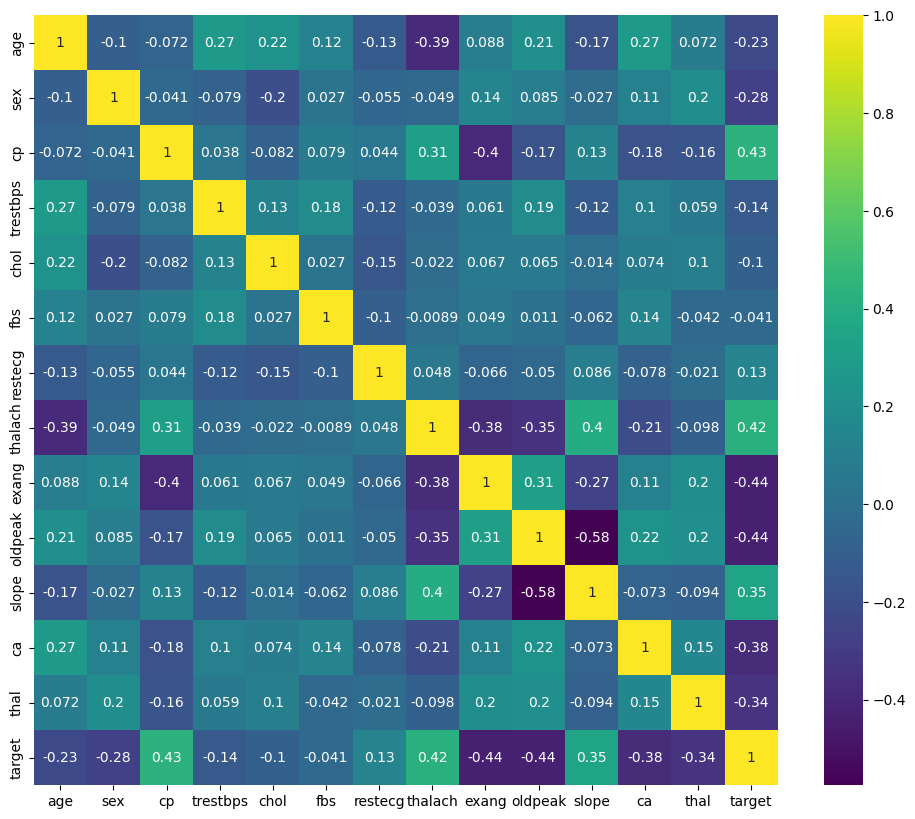

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Check the Correlation of features with the target variable.**

In [ ]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

The following plot shows the Distribution of Age. This Graph tells that the highest number of people suffering from heart diseases are in the age group of 55-65 years.

<ipython-input-9-214f581e9deb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],color='cyan',kde=False)


<Axes: xlabel='age'>

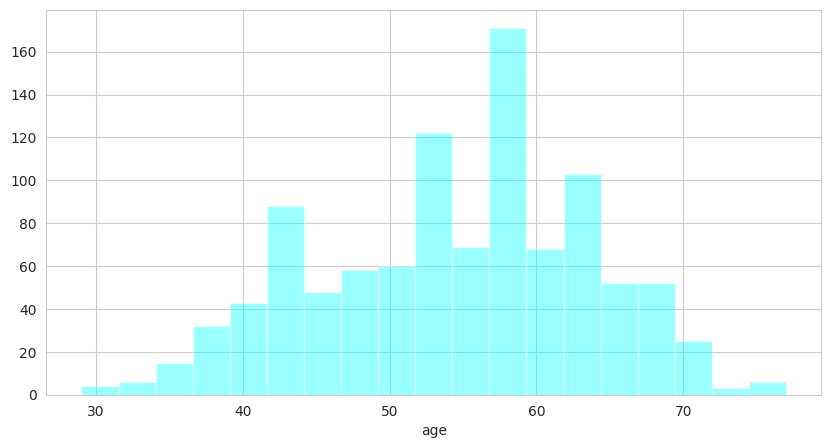

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.distplot(df['age'],color='cyan',kde=False)

### Now , Let's Look at target. It is such a quite balanced with almost equal number of both classes

<Axes: ylabel='count'>

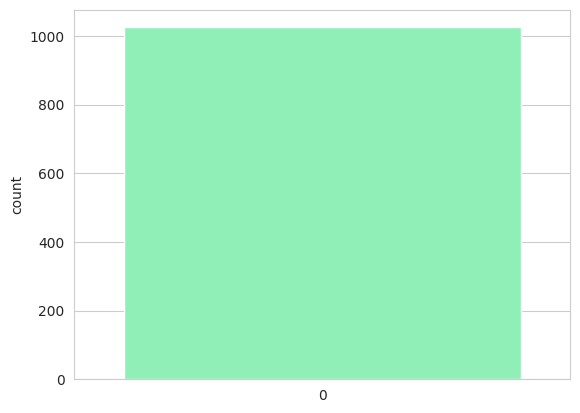

In [ ]:
sns.countplot(df['target'],palette='rainbow')

## It's time to do some other plots.

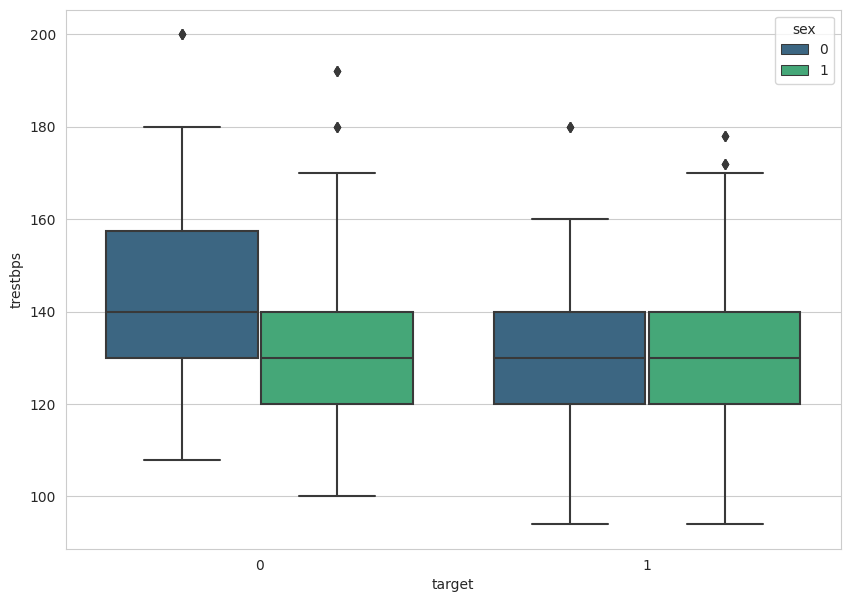

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='trestbps', hue='sex', data=df, palette='viridis')
plt.show()


<Axes: xlabel='target', ylabel='count'>

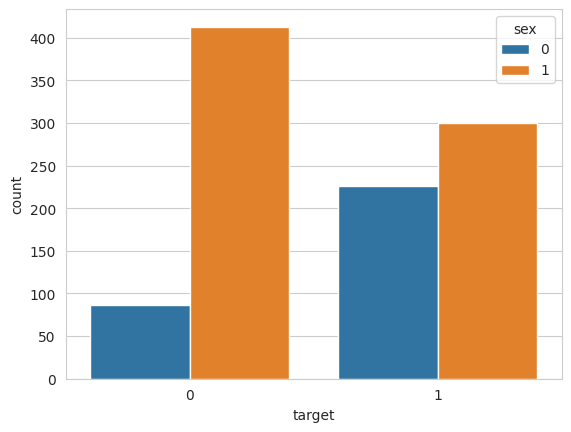

In [ ]:
sns.countplot(x='target',hue='sex',data=df)

<Axes: xlabel='target', ylabel='age'>

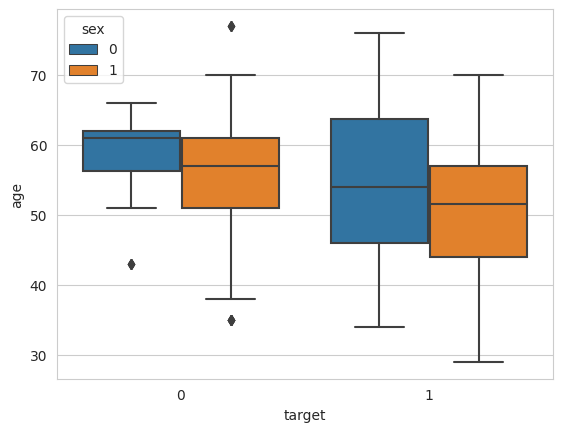

In [ ]:
sns.boxplot(x='target',y='age',hue='sex',data=df)

### The following function changes int-type categorical columns to object-type to perform OneHotEncoding (using pd.get_dummies). If we don't change them to object-type,after performing OneHotEncoding the values remains same.So that's why we changed them to object-type. Then we append the categorical column into categories .

In [ ]:
categories = []
def categorical(df):
    for column in df.drop('target',axis=1).columns :
        if len(df[column].value_counts()) <10 and df[column].dtype != 'object': # and df[column].dtype != 'object' is no needed.
            df[column] = df[column].astype('object')
            categories.append(column)
    return df

In [ ]:
df = categorical(df)

In [ ]:
categories

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


### Creating Dummy Variables for those categorical columns. Make sure that drop_first = True to avoid "Dummy Variable Trap".

In [ ]:
onehot = pd.get_dummies(df[categories],drop_first = True)
onehot

<ipython-input-19-016ba1468c40>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(df[categories],drop_first = True)
<ipython-input-19-016ba1468c40>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(df[categories],drop_first = True)
<ipython-input-19-016ba1468c40>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(df[categories],drop_first = True)
<ipython-input-19-016ba1468c40>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(df[categories],drop_first = True)
<ipython-input-19-01

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1021,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
1022,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0
1023,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.drop(categories,axis=1,inplace=True) # Removing those categorical columns
df

,age,trestbps,chol,thalach,oldpeak,target
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1
1021,60,125,258,141,2.8,0
1022,47,110,275,118,1.0,0
1023,50,110,254,159,0.0,1


In [ ]:
y = df['target']

In [ ]:
df.drop('target',axis=1,inplace=True)
df = pd.concat([df,onehot],axis=1)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X = df.values

In [ ]:
X.shape

(1025, 22)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
X_train.shape,X_test.shape

((820, 22), (205, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:5] = sc.fit_transform(X_train[:,0:5])
X_test[:,0:5] = sc.transform(X_test[:,0:5])

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predictions = rf.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

# Hyperparameter Tuning Starts...!

## Tuning Random Forest

In [ ]:
n_estimators = [200,300,400,500,600,700]
max_depth = range(1,12)
criterions = ['gini', 'entropy']
parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto',n_jobs=-1),
                    param_grid=parameters,
                    cv=5,
                    verbose=1,
                    n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='auto', n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 12),
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             verbose=1)

In [ ]:
rf_grid = grid.best_estimator_
rf_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=200,
                       n_jobs=-1)

In [ ]:
predictions = rf_grid.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

## Let's look at some important features...!

In [ ]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index=df.columns,
                                   columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
thalach,0.118266
oldpeak,0.116911
thal_2,0.096511
age,0.083812
chol,0.080193
thal_3,0.072553
trestbps,0.072462
exang_1,0.065043
sex_1,0.040574
cp_2,0.036803


## Tuning Logistic Regression

In [ ]:
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,3.2,3.6,
          4,5,6,7,8,9,10]
penalties = ['l1','l2']
solvers = ['liblinear', 'sag','lbfgs']
parameters = {'penalty': penalties, 'C': C_vals, 'solver':solvers}

grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=parameters,
                    scoring='accuracy',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               3.2, 3.6, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [ ]:
lr_grid = grid.best_estimator_
lr_grid.fit(X_train,y_train)

LogisticRegression(C=0.6, solver='sag')

In [ ]:
predictions = lr_grid.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 83,  15],
       [  7, 100]])

## Tuning SVM

In [ ]:
C = [0.01, 0.1, 1,1.2,1.5,2,2.5,3,3.2,3.5,4]
gamma = [0.0001,0.001,0.005, 0.01, 0.1, 1]
parameters = {'C': C, 'gamma' : gamma}
grid = GridSearchCV(estimator=SVC(kernel = 'rbf', probability=True),
                    param_grid=parameters,
                    scoring='accuracy',
                    verbose=1,
                    cv=5,
                    n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 1.2, 1.5, 2, 2.5, 3, 3.2, 3.5, 4],
                         'gamma': [0.0001, 0.001, 0.005, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
svm_grid = grid.best_estimator_
svm_grid.fit(X_train,y_train)

SVC(C=1, gamma=1, probability=True)

In [ ]:
predictions = svm_grid.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 94,   4],
       [  0, 107]])

In [ ]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index=df.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
thalach,0.118266
oldpeak,0.116911
thal_2,0.096511
age,0.083812
chol,0.080193
thal_3,0.072553
trestbps,0.072462
exang_1,0.065043
sex_1,0.040574
cp_2,0.036803


## Tuning Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
n_estimators = [200,300,330,370,400,430,470,500,600,700]


parameters = {'n_estimators':n_estimators}

grid = GridSearchCV(BaggingClassifier(base_estimator= None),
                                 param_grid=parameters,
                                 cv=5,verbose=1,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [200, 300, 330, 370, 400, 430, 470,
                                          500, 600, 700]},
             verbose=1)

In [ ]:
bag_grid = grid.best_estimator_
bag_grid.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, n_estimators=300)

In [ ]:
predictions = bag_grid.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

## Tuning XGBClassifier

In [ ]:
base_score = [0.1,0.3,0.5,0.7,0.9]
max_depth = range(4,15)
learning_rate = [0.01,0.1,0.2,0.3,0.4]
gamma = [0.001,0.01,0.1,0.3,0.5]
parameters = {'base_score':base_score,
              'max_depth':max_depth,
              'learning_rate': learning_rate,
              'gamma':gamma
              }
grid = GridSearchCV(estimator=XGBClassifier(n_jobs=-1),
                    param_grid=parameters,
                    cv=5,
                    verbose=1,
                    n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1375 candidates, totalling 6875 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'gamma': [0.001, 0.01, 0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(4, 15)},
             verbose=1)

In [ ]:
xgb_grid = grid.best_estimator_
xgb_grid.fit(X_train,y_train)

XGBClassifier(base_score=0.1, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = xgb_grid.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

## Now, Combine all of them using Voting Classifier...!

In [ ]:
vot_clf = VotingClassifier(estimators=[('rf',rf_grid),
                                       ('lr',lr_grid),
                                       ('svc',svm_grid),
                                       ('bag',bag_grid),
                                       ('xgb',xgb_grid)], voting='hard')
vot_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=9,
                                                     max_features='auto',
                                                     n_estimators=200,
                                                     n_jobs=-1)),
                             ('lr', LogisticRegression(C=0.6, solver='sag')),
                             ('svc', SVC(C=1, gamma=1, probability=True)),
                             ('bag',
                              BaggingClassifier(base_estimator=None,
                                                n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=0.1, booster=None,
                                            callbacks=None,
                                            colsample_bylev...
                                            feature_types=None, gamma=0.01,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
predictions = vot_clf.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

In [ ]:
vot_clf.score(X_test,y_test)

1.0

In [ ]:
rf_grid.score(X_test,y_test)

1.0

In [ ]:
bag_grid.score(X_test,y_test)

1.0

In [ ]:
xgb_grid.score(X_test,y_test)

1.0

###  Let's use Artificial Neural Network (ANN) ...!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(units=30,activation = 'relu' ,input_shape=(22,)))

model.add(Dropout(0.2))

model.add(Dense(units=15,activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(units=7,activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(units=1,activation = 'sigmoid'))


model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stop]
                    )

Epoch 1/200
26/26 [==============================] - 2s 12ms/step - loss: 0.6681 - accuracy: 0.5890 - val_loss: 0.5724 - val_accuracy: 0.7805
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.6463 - val_loss: 0.5051 - val_accuracy: 0.8390
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7390 - val_loss: 0.4473 - val_accuracy: 0.8293
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7646 - val_loss: 0.4023 - val_accuracy: 0.8390
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7854 - val_loss: 0.3697 - val_accuracy: 0.8585
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7976 - val_loss: 0.3483 - val_accuracy: 0.8537
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.8098 - val_loss: 0.3264 - val_accuracy: 0.8585
Epoch 8/200


In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predictions = [1 if i>0.5 else 0 for i in predictions]

In [ ]:
confusion_matrix(y_test,predictions)

array([[ 97,   1],
       [  0, 107]])

## Tuning ANN Using GridSearch ....!

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization

### Create a function to build our ANN model.

### Keras provides a wrapper class KerasClassifier that allows us to use our deep learning models with scikit-learn, this is especially useful when you want to tune hyperparameters using scikit-learn's RandomizedSearchCV or GridSearchCV.

In [ ]:
def build_model(layers,dropout_rate=0):
    model = Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,activation='relu',input_dim=X_train.shape[1]))
        else :
            model.add(Dense(nodes,activation='relu'))

        model.add(BatchNormalization())

        if dropout_rate:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=build_model,verbose=0)

<ipython-input-64-78409745d359>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model,verbose=0)


### Define the parameters when we fit our ANN except X and y , such as epochs,callbacks etc.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks = [early_stop]

fit_parameters = {'callbacks': callbacks,
                  'epochs': 200,
                  'validation_data' : (X_test,y_test),
                  'verbose' : 0}

### Define some of the Hyperparameters of our model.

In [ ]:
layers = [(15,1),(20,10,1),(30,15,7,1)]

parameters = dict(layers=layers,dropout_rate=[0,0.1,0.2,0.3],batch_size=[32,64,128,256])

grid = GridSearchCV(estimator=model,
                    param_grid=parameters,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

### To fit the fit_params we have to do "**fit_params"

In [ ]:
grid.fit(X_train,y_train,**fit_parameters)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 173: early stopping


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f158f243c70>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128, 256],
                         'dropout_rate': [0, 0.1, 0.2, 0.3],
                         'layers': [(15, 1), (20, 10, 1), (30, 15, 7, 1)]},
             verbose=1)

In [ ]:
predictions = grid.predict(X_test)
confusion_matrix(y_test,predictions)

7/7 [==============================] - 0s 3ms/step


array([[ 98,   0],
       [  0, 107]])

### I had used grid for every tuned model.But Below grid has the tuned ANN model because it is the latest one.

In [ ]:
all_models = [rf_grid,
              lr_grid,
              svm_grid,
              bag_grid,
              xgb_grid,
              vot_clf,
              grid]
c = {}
for i in all_models :
    a = i.predict(X_test)
    b = accuracy_score(y_test,a)
    c[i] = b

7/7 [==============================] - 0s 3ms/step


In [ ]:
c

{RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=200,
                        n_jobs=-1): 1.0,
 LogisticRegression(C=0.6, solver='sag'): 0.8926829268292683,
 SVC(C=1, gamma=1, probability=True): 0.9804878048780488,
 BaggingClassifier(base_estimator=None, n_estimators=300): 1.0,
 XGBClassifier(base_score=0.1, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.01, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,


## Final Prediction !!!

In [ ]:
predictions = (max(c,key=c.get)).predict(X_test)

confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Save and Load the Model

In [ ]:
import pickle

### I saved the vot_clf model because ANN or any Deep Learning model can be saved in the h5 file format.

In [ ]:
filename = 'model.pkl'
pickle.dump(vot_clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
predictions = loaded_model.predict(X_test)
confusion_matrix(y_test,predictions)

array([[ 98,   0],
       [  0, 107]])